# CNN  for Image Classification on MNIST and CIFAR Dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

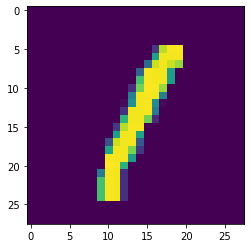

In [8]:
plt.imshow(X_train[77])

In [13]:
y_train.shape

(60000,)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_example=to_categorical(y_train)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [18]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [19]:
#normalize the data

In [23]:
#X_train=X_train/255
#X_test=X_test/255

In [24]:
X_train=X_train.reshape(60000,28,28,1)

In [25]:
X_test=X_test.reshape(10000,28,28,1)

In [26]:
#create model and train

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [29]:
model=Sequential()


In [31]:
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1, 1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))

#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [36]:
model.fit(X_train,y_cat_train,validation_data=(X_test,y_cat_test),epochs=10,callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0386 - val_accuracy: 0.9873
Epoch 2/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0235 - accuracy: 0.9930 - val_loss: 0.0394 - val_accuracy: 0.9882


In [37]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.034939,0.988767,0.038596,0.9873
1,0.023476,0.993050,0.039359,0.9882


<AxesSubplot:>

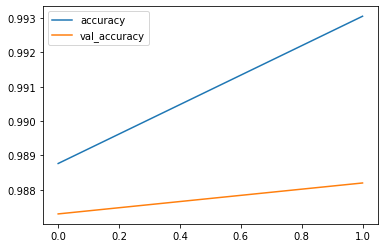

In [39]:
metrics[['accuracy','val_accuracy']].plot()

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [64]:
print(classification_report(y_cat_test,predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.97      0.98       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


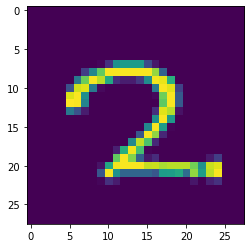

In [65]:
plt.imshow(X_test[77].reshape(28,28))

In [66]:
my_num=X_test[77]

In [67]:
(model.predict(my_num.reshape(1,28,28,1)) > 0.5)

array([[False, False,  True, False, False, False, False, False, False,
        False]])

# CIFAR10 Dataset

In [18]:
from tensorflow.keras.datasets import cifar10

In [19]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
X_test.shape

(10000, 32, 32, 3)

In [22]:
y_train.shape

(50000, 1)

In [23]:
y_test.shape

(10000, 1)

In [24]:
X_train[0].max()

255

In [25]:
#normalize
X_train=X_train/255
X_test=X_test/255

In [32]:
#convert labels to categorical
from tensorflow.keras.utils import to_categorical
y_cat_train=to_categorical(y_train,num_classes=10)
y_cat_test=to_categorical(y_test,10)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [28]:
model=Sequential()

In [29]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))

#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [33]:
model.fit(X_train,y_cat_train,validation_data=(X_test,y_cat_test),epochs=15,callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 154s 98ms/step - loss: 1.5101 - accuracy: 0.4560 - val_loss: 1.2659 - val_accuracy: 0.5427
Epoch 2/15
1563/1563 [==============================] - 151s 97ms/step - loss: 1.1838 - accuracy: 0.5803 - val_loss: 1.1057 - val_accuracy: 0.6104
Epoch 3/15
1563/1563 [==============================] - 151s 97ms/step - loss: 1.0416 - accuracy: 0.6330 - val_loss: 1.0559 - val_accuracy: 0.6299
Epoch 4/15
1563/1563 [==============================] - 151s 96ms/step - loss: 0.9389 - accuracy: 0.6705 - val_loss: 1.0074 - val_accuracy: 0.6494
Epoch 5/15
1563/1563 [==============================] - 150s 96ms/step - loss: 0.8533 - accuracy: 0.7035 - val_loss: 1.0237 - val_accuracy: 0.6510
Epoch 6/15
1563/1563 [==============================] - 150s 96ms/step - loss: 0.7764 - accuracy: 0.7273 - val_loss: 0.9828 - val_accuracy: 0.6713
Epoch 7/15
1563/1563 [==============================] - 150s 96ms/step - loss: 0.7050 - accuracy: 0.7538 - val_loss: 1

In [34]:
predictions=(model.predict(X_test)>0.5).astype("int32")

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1000
           1       0.89      0.65      0.75      1000
           2       0.66      0.48      0.55      1000
           3       0.55      0.36      0.43      1000
           4       0.63      0.61      0.62      1000
           5       0.66      0.46      0.54      1000
           6       0.69      0.78      0.73      1000
           7       0.86      0.54      0.66      1000
           8       0.75      0.78      0.77      1000
           9       0.78      0.70      0.74      1000

   micro avg       0.72      0.60      0.66     10000
   macro avg       0.73      0.60      0.65     10000
weighted avg       0.73      0.60      0.65     10000
 samples avg       0.60      0.60      0.60     10000



/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
my_image=X_test[21]

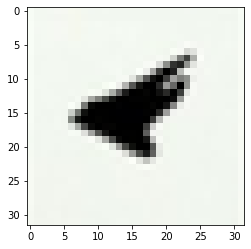

In [60]:

plt.imshow(my_image)

In [61]:
y_test[7]

array([6], dtype=uint8)

In [62]:
(model.predict(my_image.reshape(1,32,32,3))>0.5).astype("int32")

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)